In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

C:\Users\장소현\AppData\Local\Temp\ipykernel_31064\552984518.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='주문 요일', y='총액', data=day_sales, palette='viridis')


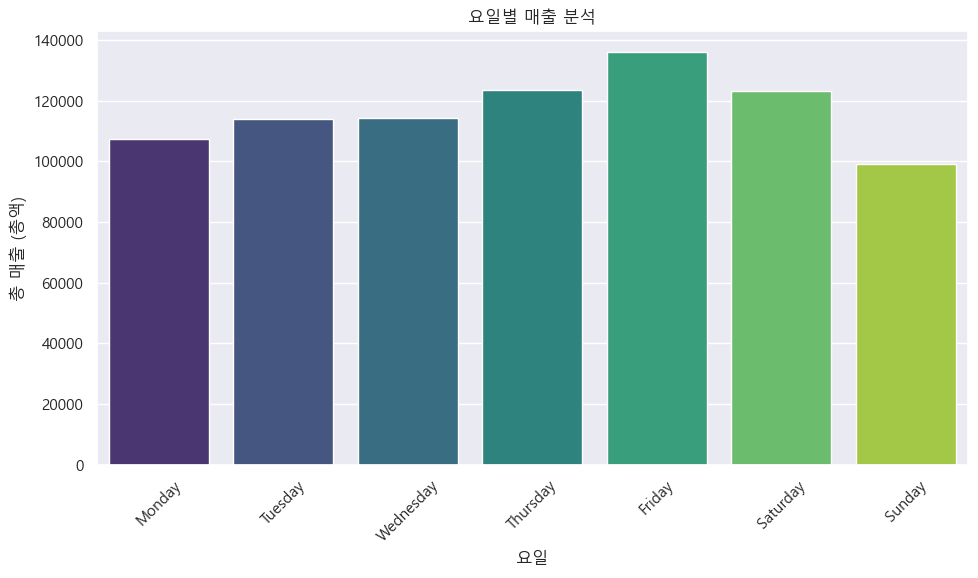

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('Pizza Sales Dataset.csv')

# 컬럼명 한글로 변경
df.rename(columns={
    'pizza_id': '피자 ID',
    'order_id': '주문 ID',
    'pizza_name_id': '피자 이름 ID',
    'quantity': '주문 수량',
    'order_date': '주문 날짜',
    'order_day': '주문 요일',
    'order_time': '주문 시간',
    'unit_price': '단가',
    'total_price': '총액',
    'pizza_size': '피자 사이즈',
    'pizza_category': '피자 종류',
    'pizza_ingredients': '피자 재료 목록',
    'pizza_name': '피자 이름'
}, inplace=True)

# ✅ 요일별 매출 집계
day_sales = df.groupby('주문 요일')['총액'].sum().reset_index()

# ✅ 요일 순서 지정 (정렬을 위해)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['주문 요일'] = pd.Categorical(day_sales['주문 요일'], categories=weekday_order, ordered=True)
day_sales = day_sales.sort_values('주문 요일')

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='주문 요일', y='총액', data=day_sales, palette='viridis')

plt.title('요일별 매출 분석')
plt.xlabel('요일')
plt.ylabel('총 매출 (총액)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("Pizza Sales Dataset.csv")

# 'order_day'와 'order_time'을 이용해 시간대 구간 생성
def get_time_slot(hour):
    if 6 <= hour < 11:
        return '아침(6~11시)'
    elif 11 <= hour < 15:
        return '점심(11~15시)'
    elif 15 <= hour < 18:
        return '오후(15~18시)'
    elif 18 <= hour < 22:
        return '저녁(18~22시)'
    else:
        return '심야(22~익일6시)'

# 'order_time'에서 시간 추출
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df['hour'] = df['order_time'].dt.hour
df['time_slot'] = df['hour'].apply(get_time_slot)

# 요일별 시간대별 주문 수량 집계
order_counts = df.groupby(['order_day', 'time_slot'])['quantity'].sum().unstack().fillna(0)

# 시간대 순서 정렬
time_slot_order = ['아침(6~11시)', '점심(11~15시)', '오후(15~18시)', '저녁(18~22시)', '심야(22~익일6시)']
order_counts = order_counts[time_slot_order]

# 파일로 저장
output_path = r"C:\Users\장소현\Desktop\workspace\The file\Mid_Project\요일별_시간대별_주문량_실제데이터.csv"
order_counts.to_csv(output_path, encoding='utf-8-sig')

output_path

C:\Users\장소현\AppData\Local\Temp\ipykernel_31064\3917633386.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')


'C:\\Users\\장소현\\Desktop\\workspace\\The file\\Mid_Project\\요일별_시간대별_주문량_실제데이터.csv'

In [ ]:
결과 분석 : 업무 일 중 중반 요일의 점심시간대가 활발하게 주문 많음. 금요일과 토요일 저녁 시간대 주문량 급증. 금요일과 토요일에 심야주문량 상대적 많음.

In [ ]:
인사이트 : 누구나 좋아하는 클래식 피자나 가벼운 건강식 베지 피자를 평일 점심 세트에 추천.